<a href="https://colab.research.google.com/github/samyff12/LATAM/blob/main/IMF_BM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install wbgapi
import wbgapi as wb  # api importe de datos del WB
import pandas as pd
import numpy as np

import urllib.request as urllib2
! pip install weo
import weo          # api WEO
from weo import WEO

In [2]:
display(wb.source.info(27))   # global economic prospects 27 INFO

print("\nPublicaciones WEO\n",weo.all_releases()[-2:])

id,name,code,concepts,lastupdated
27,Global Economic Prospects,GEP,3,2022-01-11
,1 elements,,,



Publicaciones WEO
 [(2021, 2), (2022, 1)]


In [4]:
# CODIGOS DE VARIABLES
wb.source.info()

# codigo de paises
# wb.economy.info()

#info de las series
wb.series.info(q='GDP')

id,value
EG.GDP.PUSE.KO.PP,GDP per unit of energy use (PPP $ per kg of oil equivalent)
EG.GDP.PUSE.KO.PP.KD,GDP per unit of energy use (constant 2017 PPP $ per kg of oil equivalent)
EG.USE.COMM.GD.PP.KD,"Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)"
NY.GDP.DEFL.KD.ZG,"Inflation, GDP deflator (annual %)"
NY.GDP.DEFL.KD.ZG.AD,"Inflation, GDP deflator: linked series (annual %)"
NY.GDP.DEFL.ZS,GDP deflator (base year varies by country)
NY.GDP.DEFL.ZS.AD,GDP deflator: linked series (base year varies by country)
NY.GDP.DISC.CN,Discrepancy in expenditure estimate of GDP (current LCU)
NY.GDP.DISC.KN,Discrepancy in expenditure estimate of GDP (constant LCU)
NY.GDP.MKTP.CD,GDP (current US$)


In [5]:
# lista de paises de LATAM
latam = list(dict(wb.economy.coder(['Latin America and the Caribbean','Argentina', 'Peru', 'Chile', 'Dominican Republic',
                  'Panama','Colombia','El Salvador','Guatemala','Mexico','Nicaragua','Bolivia',
                  'Costa Rica','Brazil','Honduras','Paraguay','Ecuador','Uruguay']))
.values())

latam[0] = 'LCN' # añadiendo AL y el Caribe


data = wb.data.DataFrame('NYGDPMKTPKDZ', latam , db=27).sort_values('2021',ascending=False) # Crecimiento real

# PPA 2017 segund banco mundial
gdp_percap_ppa = wb.data.DataFrame('NY.GDP.PCAP.PP.KD', latam, time=range(1990,2030)) 

#2021 - 19
data['21/19 BM'] = ((100*(1+data['2020']/100))*(1+data['2021']/100) - 100).round(1)

# data.sort_values('21/19 BM',ascending=False)

In [6]:
gdp_percap_ppa.iloc[:,-3:].round(2).sort_values(by='YR2019',ascending=False)

,YR2019,YR2020,YR2021
economy,,,
PAN,31440.26,25389.81,NaN
CHL,24967.58,23324.52,NaN
URY,23032.73,21608.43,NaN
ARG,22066.10,19690.66,NaN
CRI,20937.54,19903.14,NaN
MEX,19677.28,17852.36,NaN
DOM,18412.90,17003.01,NaN
LCN,16043.09,14824.33,NaN
BRA,14763.87,14063.98,NaN


In [14]:
año = str(input())
mes = str(np.where(input()=='a','Apr','Oct'))

# ultima publicacion
weo.all_releases()[-1]

2022
a


(2022, 1)

In [ ]:
# w.variables()

In [15]:
url = 'https://www.imf.org/-/media/Files/Publications/WEO/WEO-Database/' + año + '/WEO' + mes + año + 'all.ashx' # link

# descarga de archivo
urllib2.urlretrieve(url,'weo.csv')

('weo.csv', <http.client.HTTPMessage at 0x7f3e92c24d50>)

In [16]:
w = WEO('weo.csv') # extracción de base de datos (lectura de csv)

# obtencion crecimiento real desde 2019
dfweo = w.getc("NGDP_RPCH").loc['2019':,latam[1:]].T

# Comparativo prepandemia
dfweo['21/19 WEO'] = ((100*(1+dfweo['2020']/100))*(1+dfweo['2021']/100) - 100).round(1)
dfweo.sort_values('21/19 WEO',ascending=False)

,2019,2020,2021,2022,2023,2024,2025,2026,2027,21/19 WEO
,,,,,,,,,,
NIC,-3.674,-1.977,10.300,3.800,2.200,2.400,2.600,2.750,3.000,8.1
GTM,3.867,-1.519,8.000,3.954,3.614,3.542,3.501,3.502,3.503,6.4
CHL,0.845,-6.063,11.690,1.525,0.485,1.656,2.225,2.472,2.459,4.9
DOM,5.052,-6.720,12.263,5.475,4.964,5.000,5.000,5.000,5.000,4.7
PRY,-0.402,-0.820,4.200,0.300,4.500,3.500,3.500,3.500,3.500,3.3
CRI,2.418,-4.051,7.580,3.340,3.140,3.243,3.181,3.159,3.160,3.2
COL,3.187,-7.048,10.563,5.800,3.644,3.440,3.360,3.445,3.445,2.8
HND,2.653,-8.965,12.500,3.800,3.540,3.640,3.740,3.940,3.940,2.4
SLV,2.633,-7.942,10.300,3.000,2.250,2.160,2.000,1.965,1.965,1.5


In [ ]:
 imf_gdp_percap_ppp = w.getc("NGDPRPPPPC").loc['2019':,latam[1:]].T
 imf_gdp_percap_ppp.sort_values('2021',ascending=False)

In [18]:
df = data[['2021','21/19 BM']]
df = df.merge(dfweo[dfweo.columns[[2,-1]]],how='inner',left_index=True,right_index=True).round(1)
#df

''

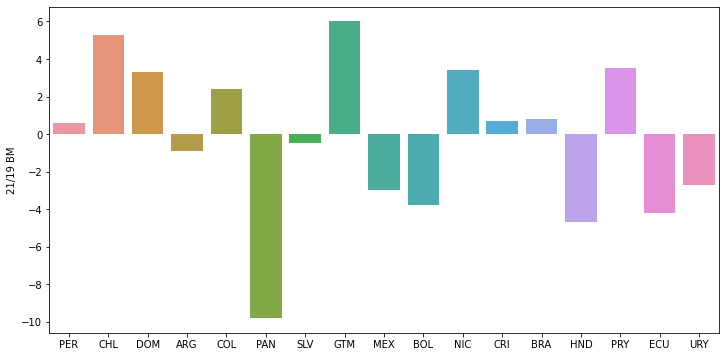

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.barplot(x = df.index, y = df['21/19 BM'])
;

In [20]:
df1 = df[['21/19 BM','21/19 WEO']].reset_index()
#df1 = df1.melt(id_vars = df1['index'], var_name = 'organismo', value_name='value')
df1 = pd.melt(df1,id_vars='index', var_name = 'organismo', value_name='value').sort_values('value')

''

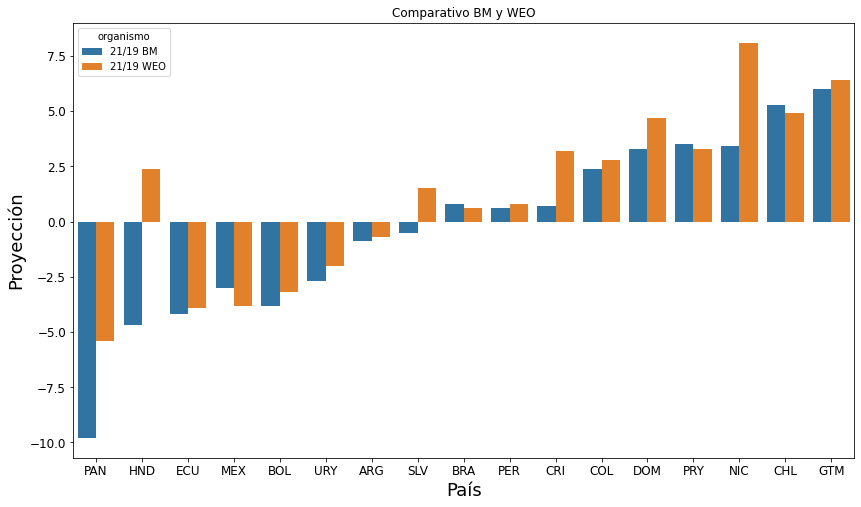

In [22]:
plt.figure(figsize=(14,8))
sns.barplot(data=df1 ,x='index', y='value', hue='organismo')
plt.xlabel('País',fontsize=18)
plt.ylabel('Proyección',fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Comparativo BM y WEO')
;

In [24]:
import plotly.express as px
fig = px.bar(df1, x="index", y="value", text='value',
                 color="organismo", barmode="group", height=600,
                 title='Proyecciones FMI y BM prepandemia')
fig.show()